<a href="https://colab.research.google.com/github/JSEFERINO/Teoria-de-Probabilidad-MEYCD/blob/main/12_C_Probabilidad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breves notas de Teoria de la Probabilidad**
 - **Por Julio Hurtado Marquez**


# **Ejemplo. (El problema de los dos amigos - Luis Rincón)**
+ *Dos amigos deciden encontrarse en cierto lugar pero olvidan la hora exacta de la cita, únicamente recuerdan que la hora era entre las 12:00 y las 13:00 horas. Cada uno de ellos decide llegar al azar en ese lapso y esperar sólamente 10 minutos. ¿Cuál es la probabilidad de que los amigos se encuentren?*

# **Ejemplo. (El problema de los dos amigos - Luis Rincón) - Solución**
+ Sean $X$ y $Y$ el tiempo medido en minutos en los que llegan los
dos amigos.
+ El espacio muestral del experimento consta de las parejas $(X,Y)$ tal que cada entrada de este vector es un instante entre las 12:00 y las 13:00 horas.
+ Gráficamente este espacio muestral se puede representar como
el cuadrado que se muestra en la Figura siguiente.

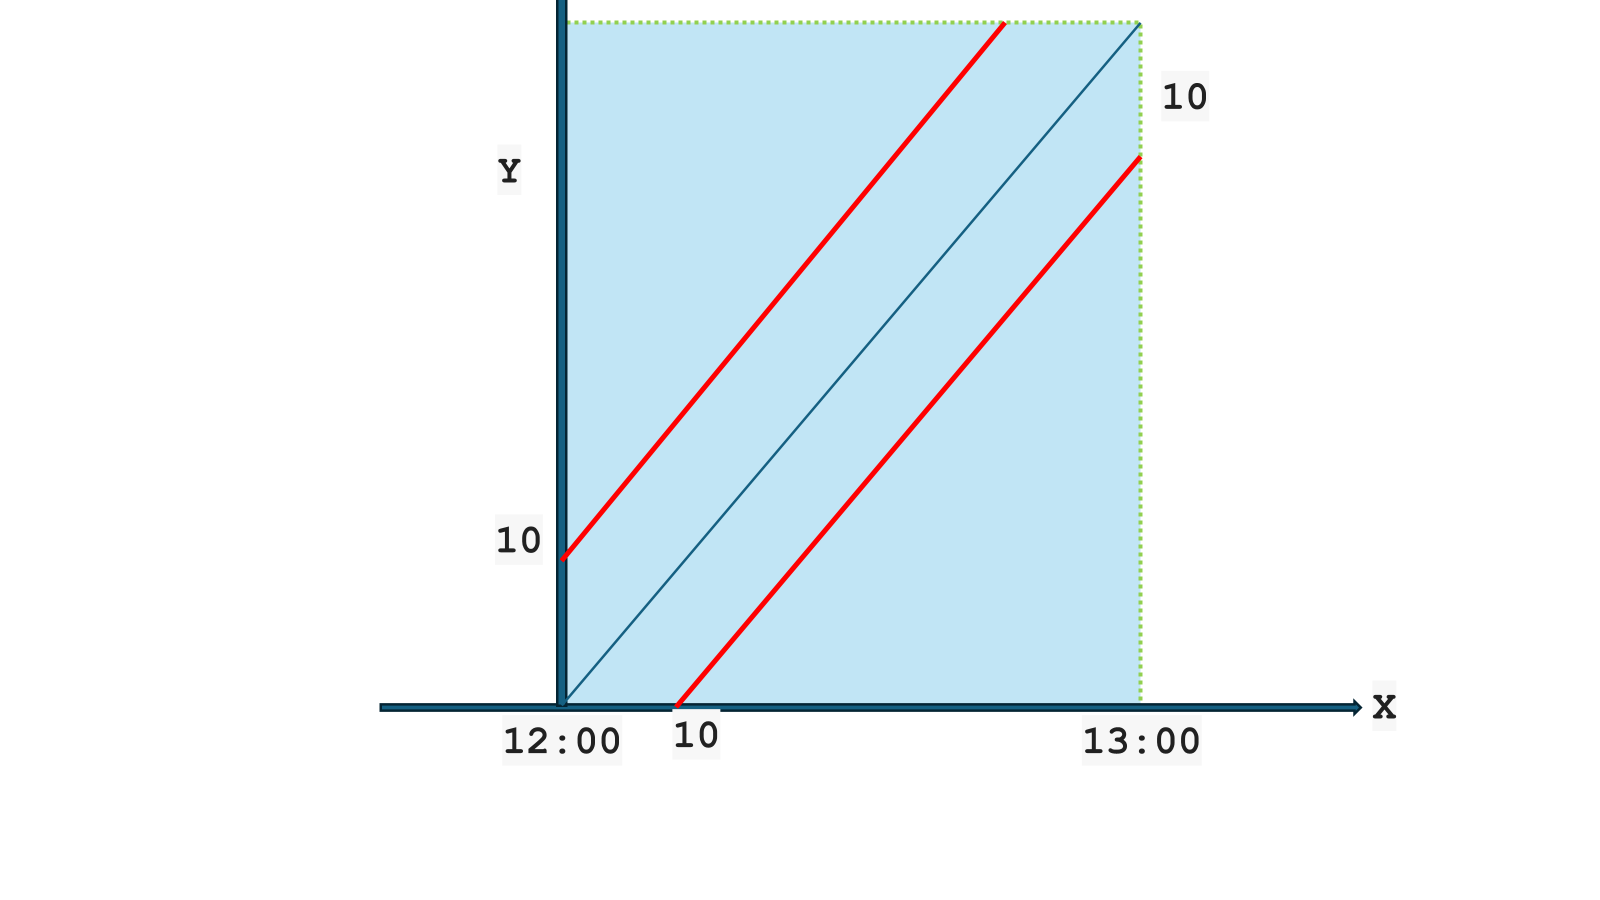

+ Los amigos se encuentran si se dá $A=\{(X,Y):|X-Y|\leq 10\}$
+ Entonces
$$\mathbb{P}(A)=\frac{n(A)}{n(\Omega)}=\frac{60^2-50^2}{60^2}=\frac{11}{36}=0.3055$$

## **REsolviendo el problema usando Python**

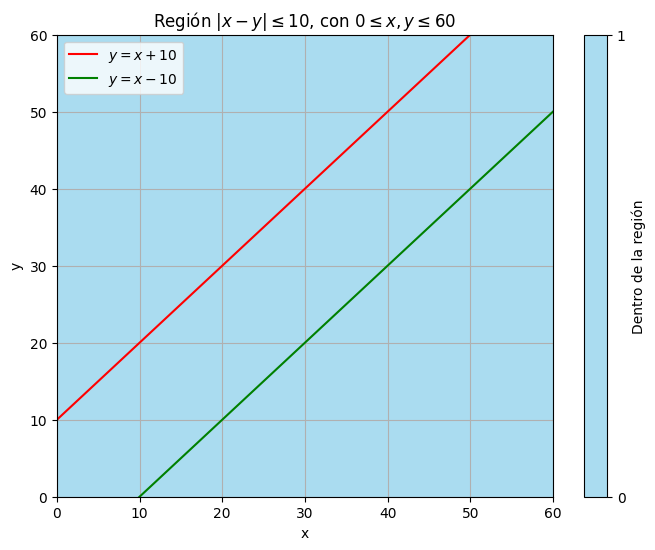

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir límites
x = np.linspace(0, 60, 400)
y = np.linspace(0, 60, 400)

# Crear malla de puntos (x, y)
X, Y = np.meshgrid(x, y)

# Definir las líneas y la condición
linea_superior = X - Y <= 10
linea_inferior = X - Y >= -10

# Crear gráfico de la región
plt.figure(figsize=(8, 6))

# Dibujar la región entre las líneas
plt.contourf(X, Y, (linea_superior & linea_inferior), levels=[0, 1], colors=['skyblue', 'white'], alpha=0.7)

# Dibujar las líneas y = x + 10 y y = x - 10
plt.plot(x, x + 10, color='red', label='$y = x + 10$')
plt.plot(x, x - 10, color='green', label='$y = x - 10$')

plt.title('Región $|x - y| \leq 10$, con $0 \leq x, y \leq 60$')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.grid(True)
plt.legend()
plt.colorbar(label='Dentro de la región')
plt.show()


In [ ]:
import numpy as np

# Definir el número de simulaciones
num_simulaciones = 1000000

# Simular la llegada de los amigos dentro del intervalo de 60 minutos (12:00 - 13:00)
amigo1_llegada = np.random.uniform(0, 60, size=num_simulaciones)
amigo2_llegada = np.random.uniform(0, 60, size=num_simulaciones)

# Calcular la diferencia en los tiempos de llegada
diferencia_tiempos = np.abs(amigo1_llegada - amigo2_llegada)

# Contar cuántas veces la diferencia es menor o igual a 10 minutos
encuentros = np.sum(diferencia_tiempos <= 10)

# Calcular la probabilidad de que se encuentren
probabilidad_encuentro = encuentros / num_simulaciones

print(f"Probabilidad de que los amigos se encuentren: {probabilidad_encuentro:.4f}")


Probabilidad de que los amigos se encuentren: 0.3053


## **La ley de grandes números en la forma sencilla de entender**
+ *La ley de grandes números y el Teorema del límite central, constituyen los cimientos de la teoría de probabilidad.*
+ ***La ley de grandes números: si se repite un experimento aleatorio, bajo las mismas condiciones, un número ilimitado de veces; y si estas repeticiones son independientes la una de la otra, entonces la frecuencia de veces que un evento $A$  ocurra, convergerá con probabilidad 1 a un número que es igual a la probabilidad de que A  ocurra en una sola repetición del experimento***.
## **Algunos ejemplos para entender la Ley de los grandes números**


### **a. El ejemplo del lanzamiento de la moneda**
+ En el Lanzamiento de una moneda $$\mathbb{P}(Cara)=\mathbb{P}(Sello)=0.5$$

In [8]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np # importando numpy
import pandas as pd # importando pandas

np.random.seed(2131982) # para poder replicar el random

%matplotlib inline

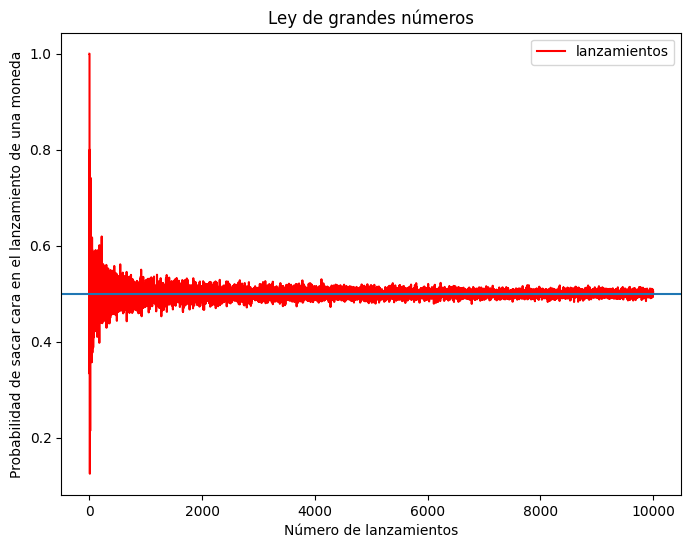

In [ ]:
# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 seca=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos)
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("Probabilidad de sacar cara en el lanzamiento de una moneda")
plt.show()


### **a. El ejemplo del lanzamiento de un dado**
+ En el Lanzamiento de un dado $$\mathbb{P}(1)=\cdots=\mathbb{P}(6)=\frac{1}{6}$$

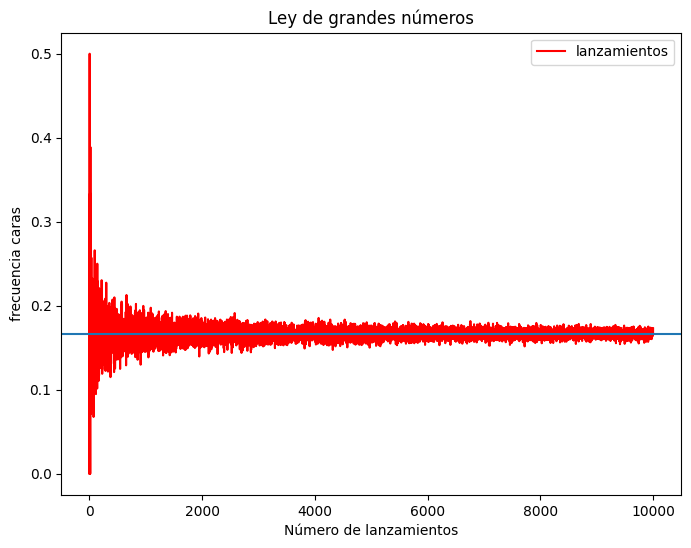

In [9]:
# Ejemplo ley de grandes números
# Cara_Dado: p{Xi = xi}=1/6; xi = 1, 2, 3, 4, 5, 6.

resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6])
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

## **Otra forma de expresar la Ley de los grandes números**
+ *La Ley de los Grandes Números (LGN) establece que a medida que se incrementa el número de experimentos aleatorios, la media de los resultados obtenidos se aproxima a la media esperada teórica.*
+ **En el caso de un dado justo de seis caras, la media esperada teórica es 3.5, ya que la suma de los valores en las caras**
+ $$\mathbb{E}(X)=\frac{1+2+3+4+5+6}{6}=\frac{21}{6} = 3.5=μ$$

Voy a simular el lanzamiento de un dado varias veces y calcular la media de los resultados acumulativos para ver cómo se aproxima a 3.5.


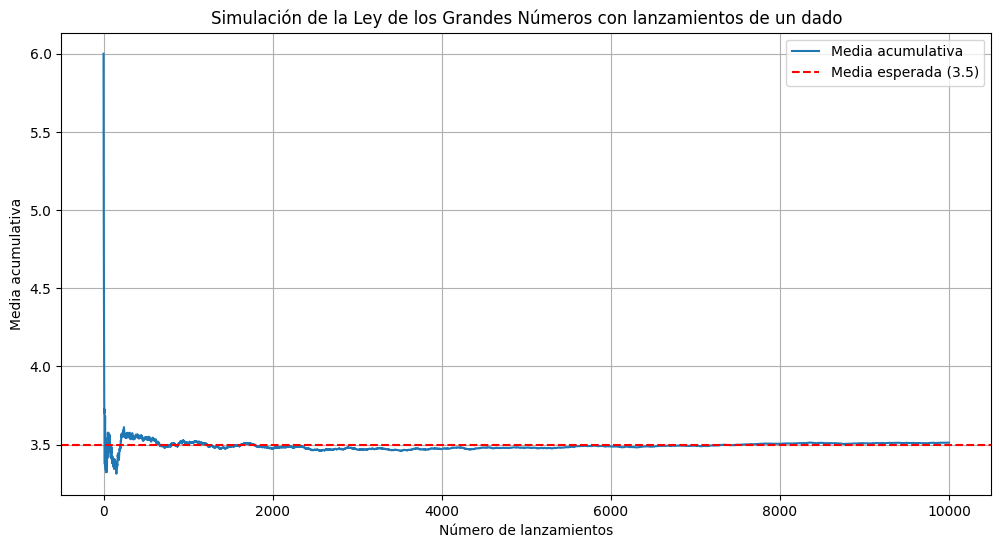

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de lanzamientos de un dado
n_lanzamientos = 10000
resultados = np.random.randint(1, 7, n_lanzamientos)

# Cálculo de la media acumulativa
media_acumulativa = np.cumsum(resultados) / np.arange(1, n_lanzamientos + 1)

# Gráfico de la media acumulativa
plt.figure(figsize=(12, 6))
plt.plot(media_acumulativa, label='Media acumulativa')
plt.axhline(y=3.5, color='r', linestyle='--', label='Media esperada (3.5)')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Media acumulativa')
plt.title('Simulación de la Ley de los Grandes Números con lanzamientos de un dado')
plt.legend()
plt.grid(True)
plt.show()


#  **12.0 Distribuciones de Probabilidad Discreta mas comunes**

### **$\bullet$** **Uniforme Discreta**: $X\sim U(\{y_{1},y_{2}\dots,y_{n}\})$
### **$\bullet$** **Binomial**: $X\sim B(n,p)$
### **$\bullet$** **Geométrica**:  $X\sim G(p)$
### **$\bullet$** **Hipergeométrica**: $X\sim H(N,M,n)$
### **$\bullet$** **Binomial Negativa**: : $X\sim Bneg(r,p)$
### **$\bullet$** **Poisson**: $X\sim U(\lambda)$




# **13.0 La distribución de Probabilidad Uniforme Discreta**
### **$\bullet$** Supongamos que  $Y$ es una variable aleatoria discreta que toma valores en el conjunto $\{y_{1},y_{2}\dots,y_{n}\}$. Decimos que  $Y\sim U(\{y_{1},y_{2}\dots,y_{n}\})$, esto es, $Y$  tiene distribución uniforme discreta, si tiene función de probabilidad  $$P\{Y=y\}=1/n$$ paa $y = y_{1},y_{2}\dots,y_{n}$
### **$\bullet$** **Valor Esperado** $$E(Y) = \frac{1}{n} \sum_{j=1}^n y_j =\bar{y}=\frac{n+1}{2} $$.

### **$\bullet$** **Varianza** $$ V(Y) = \frac{1}{n} \sum_{j=1}^n (y_j - E(Y))^2 =\frac{n^2-1}{12}$$.



## **13.1 Ejemplo.**
### **$\bullet$** **Problema**. Suponga que se lanza un dado perfecto y se anota el número en la cara arriba del dado. Sea $X = num_cara$. Entonces, $X\sim U(\{1, 2\dots,6\})$. Calcular y graficar la pmf de $X$

### **$\bullet$** En forma de Tabla:

|$\{X =x\}$|1|2|3|4|5|6|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$f(x)=P\{X=x\}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|


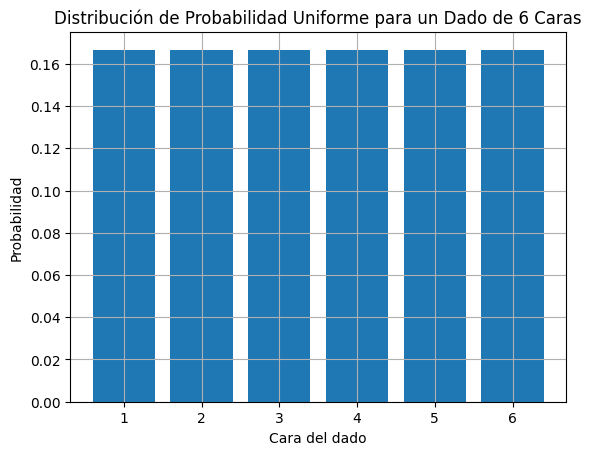

Cara 1: P(1) = 0.16666666666666666
Cara 2: P(2) = 0.16666666666666666
Cara 3: P(3) = 0.16666666666666666
Cara 4: P(4) = 0.16666666666666666
Cara 5: P(5) = 0.16666666666666666
Cara 6: P(6) = 0.16666666666666666


In [18]:
## **13.2 Usamos Python para simular el lanzamiento de un dado**
import numpy as np
import matplotlib.pyplot as plt

# X = Número en la cara arriba del dado
num_caras = 6

# Probabilidad para cada cara
probabilidad = 1 / num_caras

# Valores posibles de la variable aleatoria (caras del dado) X={1,2,3,4,5,6}
valores = np.arange(1, num_caras + 1)

# Crear un arreglo de probabilidades uniformes
probs_unifs = np.full(num_caras, probabilidad)

# Crear el gráfico de la distribución de probabilidad
plt.bar(valores, probs_unifs, tick_label=valores)
plt.xlabel('Cara del dado')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidad Uniforme para un Dado de 6 Caras')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Imprimir las probabilidades
for cara, prob in enumerate(probs_unifs, 1):
    print(f"Cara {cara}: P({cara}) = {prob}")

## **13.3 Supongamos que lanzamos el dado diez mil veces y queremos saber si esas probabilidades se mantienen - Esto es la Ley de los grandes numeros**

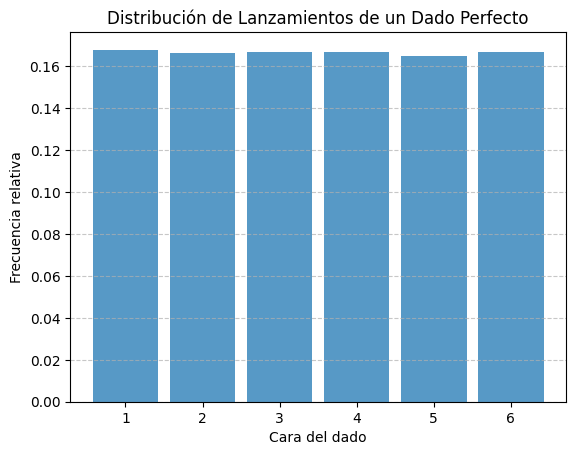

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Número de lanzamientos de dado
num_lanzamientos = 100000

# Simular lanzamientos de un dado perfecto (valores del 1 al 6)
lanzamientos = np.random.randint(1, 7, num_lanzamientos)

# Crear un histograma para mostrar la distribución
plt.hist(lanzamientos, bins=np.arange(0.5, 7.5, 1), alpha=0.75, density=True, rwidth=0.85)
plt.xlabel('Cara del dado')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución de Lanzamientos de un Dado Perfecto')
plt.xticks(np.arange(1, 7, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()


### **Distribuciones Discretas mas comunes - Aplicaciones**

1. **Distribución Uniforme Discreta**
   - **Aplicaciones**: Juegos de azar, sorteos, simulaciones donde cada resultado tiene la misma probabilidad de ocurrir (e.g., lanzar un dado).

2. **Distribución Bernoulli**
   - **Aplicaciones**: Modelar eventos con dos posibles resultados, como éxito o fracaso (e.g., lanzar una moneda).

3. **Distribución Binomial**
   - **Aplicaciones**: Modelar el número de éxitos en una serie de ensayos independientes con la misma probabilidad de éxito (e.g., número de caras al lanzar varias monedas).

4. **Distribución Geométrica**
   - **Aplicaciones**: Modelar el número de ensayos hasta el primer éxito (e.g., número de lanzamientos hasta obtener la primera cara en una moneda).

5. **Distribución Binomial Negativa**
   - **Aplicaciones**: Modelar el número de ensayos necesarios para obtener un número fijo de éxitos (e.g., número de llamadas hasta vender un producto a un número fijo de clientes).

6. **Distribución Hipergeométrica**
   - **Aplicaciones**: Modelar la probabilidad de un número de éxitos en una muestra sin reemplazo de una población finita (e.g., extracción de cartas de un mazo sin reposición).

7. **Distribución Poisson**
   - **Aplicaciones**: Modelar el número de eventos en un intervalo de tiempo o espacio fijo, cuando los eventos ocurren con una tasa constante (e.g., número de llamadas telefónicas recibidas por hora).

### **Distribuciones Continuas mas comunes - Aplicaciones**

1. **Distribución Uniforme Continua**
   - **Aplicaciones**: Modelar variables aleatorias donde todos los valores dentro de un intervalo específico son igualmente probables (e.g., tiempo de espera uniforme entre dos eventos).

2. **Distribución Exponencial**
   - **Aplicaciones**: Modelar el tiempo entre eventos en un proceso de Poisson (e.g., tiempo hasta la próxima llegada de un cliente).

3. **Distribución Gamma**
   - **Aplicaciones**: Modelar tiempos de espera acumulados (e.g., tiempo hasta la k-ésima llegada en un proceso de Poisson).

4. **Distribución Beta**
   - **Aplicaciones**: Modelar proporciones y probabilidades (e.g., tasa de éxito en una serie de experimentos).

5. **Distribución Weibull**
   - **Aplicaciones**: Análisis de confiabilidad y vida útil de productos (e.g., tiempo hasta la falla de un componente).

6. **Distribución Normal**
   - **Aplicaciones**: Modelar fenómenos naturales y sociales (e.g., alturas humanas, errores de medición, puntuaciones en exámenes).

### **Distribuciones para Pruebas Estadísticas**

1. **Distribución Ji-Cuadrada (Chi-Cuadrada)**
   - **Aplicaciones**: Pruebas de independencia y ajuste (e.g., prueba chi-cuadrada de independencia en tablas de contingencia).

2. **Distribución t de Student**
   - **Aplicaciones**: Estimar la media de una población cuando el tamaño de la muestra es pequeño y la varianza es desconocida (e.g., prueba t para comparar medias).

3. **Distribución F**
   - **Aplicaciones**: Pruebas de igualdad de varianzas y análisis de varianza (ANOVA) (e.g., comparación de varianzas de dos poblaciones).

+ **Estas distribuciones son fundamentales en estadística y probabilidad y tienen aplicaciones prácticas en muchos campos, incluyendo ingeniería, ciencias naturales, economía, y ciencias sociales.**